In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Read in batters dataset

In [4]:
df = pd.read_csv("batters_final.csv")

In [5]:
df.head()

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,...,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
0,0,1990,Jeff Bagwell,First Baseman,BOS-min,136,569,481,63.0,160,...,73,57,0.333,0.422,0.457,0.880,220,12.0,0.128295,0.100176
1,1,1991,Jeff Bagwell,First Baseman,HOU,156,650,554,79.0,163,...,75,116,0.294,0.387,0.437,0.824,242,5.0,0.115385,0.178462
2,2,1992,Jeff Bagwell,First Baseman,HOU,162,697,586,87.0,160,...,84,97,0.273,0.368,0.444,0.812,260,13.0,0.120516,0.139168
3,3,1993,Jeff Bagwell,First Baseman,HOU,142,609,535,76.0,171,...,62,73,0.320,0.388,0.516,0.903,276,6.0,0.101806,0.119869
4,4,1994,Jeff Bagwell,First Baseman,HOU,110,479,400,104.0,147,...,65,65,0.368,0.451,0.750,1.201,300,14.0,0.135699,0.135699


In [10]:
np.sum(df.isnull())

Unnamed: 0       0
year             0
name             0
position         0
team             0
games            0
pa               0
ab               0
runs           269
hits             0
hr               0
rbi            304
sb             359
cs               0
bb             300
so             345
ba               0
obp              0
slg              0
ops              0
tb               0
ibb           2303
bb_rate          5
so_rate          6
dtype: int64

So I goofed. I think I want to re-replace any SO and BB that are -999 with NaN. That way none of my counts get all messed up.

In [8]:
df.loc[df['bb'] == -999,]

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,...,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
32,32,1950,Willard Brown,Rightfielder,OTT,30,128,128,NaN,45,...,-999,-999,0.352,0.352,0.445,0.797,57,NaN,-7.804688,-7.804688
83,84,1913,Billy Southworth,Rightfielder,PMO,114,414,414,NaN,117,...,-999,-999,0.283,0.283,0.367,0.650,152,NaN,-2.413043,-2.413043
84,87,1914,Billy Southworth,Rightfielder,CLV,139,483,483,NaN,123,...,-999,-999,0.255,0.255,0.331,0.586,160,NaN,-2.068323,-2.068323
85,88,1915,Billy Southworth,Rightfielder,CLV,65,252,252,NaN,83,...,-999,-999,0.329,0.329,0.508,0.837,128,NaN,-3.964286,-3.964286
87,91,1916,Billy Southworth,Rightfielder,POR,171,627,627,NaN,188,...,-999,-999,0.300,0.300,0.432,0.732,271,NaN,-1.593301,-1.593301
88,92,1917,Billy Southworth,Rightfielder,BIR,103,358,358,NaN,102,...,-999,-999,0.285,0.285,0.366,0.651,131,NaN,-2.790503,-2.790503
89,93,1918,Billy Southworth,Rightfielder,BIR,67,258,258,NaN,81,...,-999,-999,0.314,0.314,0.415,0.729,107,NaN,-3.872093,-3.872093
102,107,1928,Billy Southworth,Rightfielder,STL-min,124,438,438,NaN,158,...,-999,-999,0.361,0.361,0.518,0.879,227,NaN,-2.280822,-2.280822
103,108,1929,Billy Southworth,Rightfielder,STL-min,37,106,106,NaN,37,...,-999,-999,0.349,0.349,0.528,0.877,56,NaN,-9.424528,-9.424528
105,110,1930,Billy Southworth,Rightfielder,STL-min,92,276,276,NaN,102,...,-999,-999,0.370,0.370,0.518,0.888,143,NaN,-3.619565,-3.619565


In [9]:
df = df.replace(-999, np.nan)

In [12]:
df.columns

Index([u'Unnamed: 0', u'year', u'name', u'position', u'team', u'games', u'pa',
       u'ab', u'runs', u'hits', u'hr', u'rbi', u'sb', u'cs', u'bb', u'so',
       u'ba', u'obp', u'slg', u'ops', u'tb', u'ibb', u'bb_rate', u'so_rate'],
      dtype='object')

Have it so that it displays all columns

In [13]:
pd.set_option('display.max_columns', 30)

In [17]:
df.head()

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,hr,rbi,sb,cs,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
0,0,1990,Jeff Bagwell,First Baseman,BOS-min,136,569,481,63.0,160,4,61.0,5.0,7,73.0,57.0,0.333,0.422,0.457,0.880,220,12.0,0.128295,0.100176
1,1,1991,Jeff Bagwell,First Baseman,HOU,156,650,554,79.0,163,15,82.0,7.0,4,75.0,116.0,0.294,0.387,0.437,0.824,242,5.0,0.115385,0.178462
2,2,1992,Jeff Bagwell,First Baseman,HOU,162,697,586,87.0,160,18,96.0,10.0,6,84.0,97.0,0.273,0.368,0.444,0.812,260,13.0,0.120516,0.139168
3,3,1993,Jeff Bagwell,First Baseman,HOU,142,609,535,76.0,171,20,88.0,13.0,4,62.0,73.0,0.320,0.388,0.516,0.903,276,6.0,0.101806,0.119869
4,4,1994,Jeff Bagwell,First Baseman,HOU,110,479,400,104.0,147,39,116.0,15.0,4,65.0,65.0,0.368,0.451,0.750,1.201,300,14.0,0.135699,0.135699


In [19]:
df.shape

(3500, 24)

In [20]:
df.describe()

,Unnamed: 0,year,games,pa,ab,runs,hits,hr,rbi,sb,cs,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3231.000000,3500.000000,3500.000000,3196.000000,3141.000000,3500.000000,3200.000000,3155.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,1197.000000,3495.000000,3494.000000
mean,1823.293429,1941.710286,111.018857,462.203714,409.935429,69.402043,123.928857,10.858286,63.652691,12.532633,2.603429,47.237812,40.865293,0.293732,0.359716,0.440896,0.800608,188.743714,6.680869,-1.524677,-2.068113
std,1048.078034,32.688245,46.457228,214.336388,188.426091,37.740530,62.057606,11.856286,37.095742,16.577553,4.513596,30.337891,30.819168,0.065049,0.072312,0.117770,0.177959,101.187907,6.199451,18.813134,21.356868
min,0.000000,1872.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-499.500000,-499.500000
25%,919.750000,1917.000000,84.000000,325.000000,294.750000,41.000000,82.000000,2.000000,37.000000,1.000000,0.000000,25.000000,17.000000,0.267000,0.328000,0.375000,0.715000,116.000000,2.000000,0.055889,0.035539
50%,1831.500000,1939.000000,128.000000,532.000000,471.000000,73.000000,137.000000,6.000000,63.000000,6.000000,0.000000,45.000000,34.000000,0.296000,0.364000,0.441000,0.805000,203.000000,5.000000,0.087065,0.071010
75%,2730.250000,1967.250000,148.000000,637.000000,558.000000,97.000000,172.000000,17.000000,91.000000,17.000000,4.000000,67.000000,60.000000,0.325000,0.397000,0.508000,0.898000,264.000000,10.000000,0.120411,0.115369
max,3624.000000,2011.000000,197.000000,763.000000,763.000000,198.000000,280.000000,60.000000,191.000000,130.000000,42.000000,170.000000,180.000000,1.000000,1.000000,1.250000,2.200000,512.000000,45.000000,0.500000,1.000000


How many times does a position occur?

In [21]:
df['position'].value_counts()

Rightfielder                                           317
Centerfielder                                          298
Leftfielder                                            270
Catcher                                                234
Second Baseman                                         219
First Baseman                                          218
Outfielder                                             169
Shortstop                                              154
Shortstop and Third Baseman                            134
Leftfielder and First Baseman                          129
Third Baseman                                          120
Third Baseman and First Baseman                         90
Rightfielder and First Baseman                          86
First Baseman and Leftfielder                           67
Second Baseman and Third Baseman                        62
First Baseman and Third Baseman                         53
Outfielder and First Baseman                            

In [23]:
df['name'].value_counts()

Rickey Henderson      41
Jim O'Rourke          34
Tim Raines            32
Ivn Rodrguez          32
Jake Beckley          31
Heinie Manush         31
Carlton Fisk          29
Willie McCovey        29
Rogers Hornsby        29
Eddie Murray          29
Joe Medwick           29
Enos Slaughter        29
High Pockets Kelly    28
Dan Brouthers         28
Jesse Burkett         27
Tony Prez             27
Rabbit Maranville     27
Brooks Robinson       26
Rick Ferrell          26
Ken Griffey           26
Willie Mays           26
George Kell           26
Tris Speaker          26
Billy Southworth      26
Roger Connor          26
Al Lpez               26
Eddie Collins         26
Paul Waner            26
Bobby Wallace         26
Cap Anson             26
                      ..
John Ward             17
Elmer Flick           17
Pee Wee Reese         17
Phil Rizzuto          16
Sam Thompson          16
Ed Delahanty          16
Lou Boudreau          16
Ron Santo             16
Bobby Doerr           16


In [24]:
df.loc[df['name'] == 'Rickey Henderson',]

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,hr,rbi,sb,cs,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
128,133,1977,Rickey Henderson,Leftfielder,OAK-min,134,599,481,120.0,166,11,69.0,95.0,22,104.0,67.0,0.345,0.466,0.468,0.934,225,NaN,0.173623,0.111853
129,134,1978,Rickey Henderson,Leftfielder,OAK-min,133,561,455,81.0,141,0,34.0,81.0,28,83.0,67.0,0.310,0.417,0.358,0.775,163,NaN,0.147950,0.119430
130,135,1979,Rickey Henderson,Leftfielder,OAK-min,71,328,259,66.0,80,3,26.0,44.0,9,53.0,41.0,0.309,0.430,0.448,0.878,116,NaN,0.161585,0.125000
131,136,1979,Rickey Henderson,Leftfielder,OAK,89,398,351,49.0,96,1,26.0,33.0,11,34.0,39.0,0.274,0.338,0.336,0.675,118,0.0,0.085427,0.097990
132,137,1980,Rickey Henderson,Leftfielder,OAK,158,722,591,111.0,179,9,53.0,100.0,26,117.0,54.0,0.303,0.420,0.399,0.820,236,7.0,0.162050,0.074792
133,138,1981,Rickey Henderson,Leftfielder,OAK,108,493,423,89.0,135,6,35.0,56.0,22,64.0,68.0,0.319,0.408,0.437,0.845,185,4.0,0.129817,0.137931
134,139,1982,Rickey Henderson,Leftfielder,OAK,149,656,536,119.0,143,10,51.0,130.0,42,116.0,94.0,0.267,0.398,0.382,0.780,205,1.0,0.176829,0.143293
135,140,1983,Rickey Henderson,Leftfielder,OAK,145,622,513,105.0,150,9,48.0,108.0,19,103.0,80.0,0.292,0.414,0.421,0.835,216,8.0,0.165595,0.128617
136,141,1984,Rickey Henderson,Leftfielder,OAK,142,597,502,113.0,147,16,58.0,66.0,18,86.0,81.0,0.293,0.399,0.458,0.857,230,1.0,0.144054,0.135678
137,142,1985,Rickey Henderson,Leftfielder,NYY-min,3,11,6,5.0,1,0,3.0,1.0,1,5.0,2.0,0.167,0.545,0.500,1.045,3,0.0,0.454545,0.181818


Ah. I might have to do something about the partial seasons that are split if the player ends up being traded.

Let's see some of these counting stats totals

In [25]:
df2 = df.groupby('name')

In [31]:
df2.hr.agg(['sum', 'max', 'mean']).sort_values('sum', ascending=0)

,sum,max,mean
name,,,
Hank Aaron,777,47,32.375000
Babe Ruth,714,60,32.454545
Willie Mays,680,52,26.153846
Ken Griffey,661,56,25.423077
Frank Robinson,645,49,25.800000
Harmon Killebrew,636,49,26.500000
Willie McCovey,614,45,21.172414
Reggie Jackson,588,47,26.727273
Ted Williams,587,43,27.952381


This is wrong. Hank Aaron had 755 home runs. Babe ruth and the rest look correct. Keep going fix later.
I know what's wrong. It's including the hidden HTML values as well, which translate to minor league numbers. In this case, 1953 he hit 23 hr's in the minors, and 1954 was his first year in the bigs. Oy vey...

In [103]:
df.loc[df['name'] == 'Hank Aaron',]

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,hr,rbi,sb,cs,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
2242,2339,1953,Hank Aaron,Rightfielder and First Baseman,MLN-min,137,574,574,NaN,208,22,NaN,NaN,0,NaN,NaN,0.362,0.362,0.589,0.951,338,NaN,-1.740418,-1.740418
2243,2340,1954,Hank Aaron,Rightfielder and First Baseman,MLN,122,509,468,58.0,131,13,69.0,2.0,2,28.0,39.0,0.280,0.322,0.447,0.769,209,NaN,0.055010,0.076621
2244,2341,1955,Hank Aaron,Rightfielder and First Baseman,MLN,153,665,602,105.0,189,27,106.0,3.0,1,49.0,61.0,0.314,0.366,0.540,0.906,325,5.0,0.073684,0.091729
2245,2342,1956,Hank Aaron,Rightfielder and First Baseman,MLN,153,660,609,106.0,200,26,92.0,2.0,4,37.0,54.0,0.328,0.365,0.558,0.923,340,6.0,0.056061,0.081818
2246,2343,1957,Hank Aaron,Rightfielder and First Baseman,MLN,151,675,615,118.0,198,44,132.0,1.0,1,57.0,58.0,0.322,0.378,0.600,0.978,369,15.0,0.084444,0.085926
2247,2344,1958,Hank Aaron,Rightfielder and First Baseman,MLN,153,664,601,109.0,196,30,95.0,4.0,1,59.0,49.0,0.326,0.386,0.546,0.931,328,16.0,0.088855,0.073795
2248,2345,1959,Hank Aaron,Rightfielder and First Baseman,MLN,154,693,629,116.0,223,39,123.0,8.0,0,51.0,54.0,0.355,0.401,0.636,1.037,400,17.0,0.073593,0.077922
2249,2346,1960,Hank Aaron,Rightfielder and First Baseman,MLN,153,664,590,102.0,172,40,126.0,16.0,7,60.0,63.0,0.292,0.352,0.566,0.919,334,13.0,0.090361,0.094880
2250,2347,1961,Hank Aaron,Rightfielder and First Baseman,MLN,155,671,603,115.0,197,34,120.0,21.0,9,56.0,64.0,0.327,0.381,0.594,0.974,358,20.0,0.083458,0.095380
2251,2348,1962,Hank Aaron,Rightfielder and First Baseman,MLN,156,667,592,127.0,191,45,128.0,15.0,7,66.0,73.0,0.323,0.390,0.618,1.008,366,14.0,0.098951,0.109445


# Histograms

(array([ 1100.,   550.,   357.,   258.,   223.,   166.,   159.,   135.,
          113.,   116.,    84.,    47.,    48.,    56.,    31.,    25.,
           15.,     5.,     7.,     5.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.]),
 <a list of 20 Patch objects>)

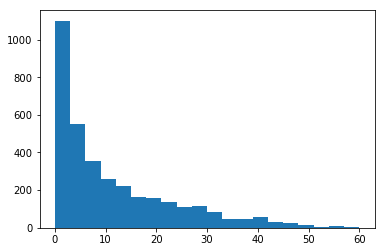

In [45]:
plt.hist(df['hr'], bins=20)

IIIIIInteresting. I might want to do something about the zero's.

In [42]:
df_gt_zero_hrs = df.loc[df['hr'] > 0,]

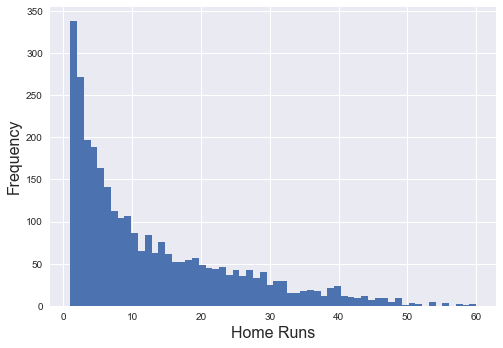

In [132]:
plt.hist(df_gt_zero_hrs['hr'], bins = 60)
plt.xlabel('Home Runs', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

How about hits.

In [116]:
df_gt_50_hits = df.loc[df['hits'] >= 50,]

In [120]:
df_gt_50_hits.loc[df_gt_50_hits['hits'] > 240,].sort_

,Unnamed: 0,year,name,position,team,games,pa,ab,runs,hits,hr,rbi,sb,cs,bb,so,ba,obp,slg,ops,tb,ibb,bb_rate,so_rate
221,227,1911,Ty Cobb,Centerfielder,DET,146,654,591,147.0,248,8,127.0,83.0,0,44.0,42.0,0.420,0.467,0.621,1.088,367,NaN,0.067278,0.064220
305,311,1920,George Sisler,First Baseman,SLB,154,692,631,137.0,257,19,122.0,42.0,17,46.0,19.0,0.407,0.449,0.632,1.082,399,NaN,0.066474,0.027457
307,313,1922,George Sisler,First Baseman,SLB,142,655,586,134.0,246,8,105.0,51.0,19,49.0,14.0,0.420,0.467,0.594,1.061,348,NaN,0.074809,0.021374
454,465,1922,Rogers Hornsby,"Second Baseman, Shortstop and Third Baseman",STL,154,704,623,141.0,250,42,152.0,17.0,12,65.0,50.0,0.401,0.459,0.722,1.181,450,NaN,0.092330,0.071023
900,947,1925,Paul Waner,Rightfielder,SFR,174,699,699,NaN,280,11,NaN,NaN,0,NaN,NaN,0.401,0.401,0.575,0.976,402,NaN,-1.429185,-1.429185
971,1021,1925,Al Simmons,Outfielder,PHA,153,697,654,122.0,253,24,129.0,7.0,14,35.0,41.0,0.387,0.419,0.599,1.018,392,NaN,0.050215,0.058824
1003,1054,1930,Bill Terry,First Baseman,NYG,154,708,633,139.0,254,23,129.0,8.0,0,57.0,33.0,0.401,0.452,0.619,1.071,392,NaN,0.080508,0.046610
1101,1154,1933,Joe DiMaggio,Centerfielder,SFR,187,762,762,NaN,259,28,NaN,NaN,0,NaN,NaN,0.340,0.340,0.543,0.883,414,NaN,-1.311024,-1.311024
1103,1156,1935,Joe DiMaggio,Centerfielder,SFR,172,679,679,NaN,270,34,NaN,NaN,0,NaN,NaN,0.398,0.398,0.672,1.069,456,NaN,-1.471281,-1.471281
1350,1417,1922,Heinie Manush,Leftfielder,OMA,167,652,652,NaN,245,20,NaN,NaN,0,NaN,NaN,0.376,0.376,0.597,0.972,389,NaN,-1.532209,-1.532209


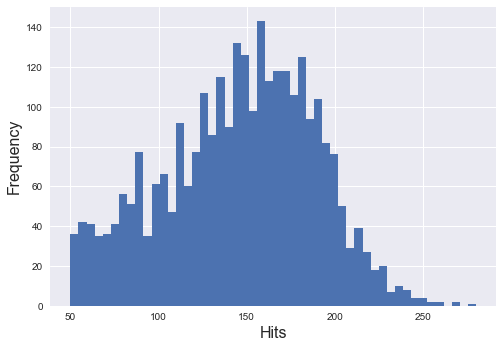

In [129]:
plt.hist(df_gt_50_hits['hits'], bins=50)
#ax = fig.add_subplot(111)
plt.xlabel('Hits', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [50]:
df_gt_ten_hits = df.loc[df['hits'] > 10,]

(array([  68.,   50.,   65.,   36.,   42.,   46.,   32.,   45.,   42.,
          48.,   49.,   38.,   53.,   72.,   77.,   56.,   65.,   64.,
          92.,   84.,   77.,  130.,  102.,  144.,  119.,  143.,  147.,
         139.,  156.,  115.,  135.,  147.,  123.,   95.,   93.,   79.,
          45.,   39.,   27.,   28.,   15.,    6.,   14.,    4.,    5.,
           2.,    1.,    0.,    2.,    1.]),
 array([  11.  ,   16.38,   21.76,   27.14,   32.52,   37.9 ,   43.28,
          48.66,   54.04,   59.42,   64.8 ,   70.18,   75.56,   80.94,
          86.32,   91.7 ,   97.08,  102.46,  107.84,  113.22,  118.6 ,
         123.98,  129.36,  134.74,  140.12,  145.5 ,  150.88,  156.26,
         161.64,  167.02,  172.4 ,  177.78,  183.16,  188.54,  193.92,
         199.3 ,  204.68,  210.06,  215.44,  220.82,  226.2 ,  231.58,
         236.96,  242.34,  247.72,  253.1 ,  258.48,  263.86,  269.24,
         274.62,  280.  ]),
 <a list of 50 Patch objects>)

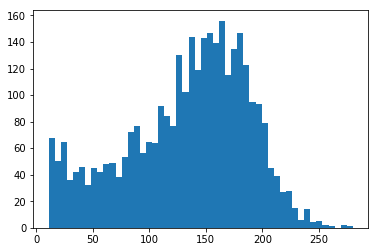

In [52]:
plt.hist(df_gt_ten_hits['hits'], bins=50)

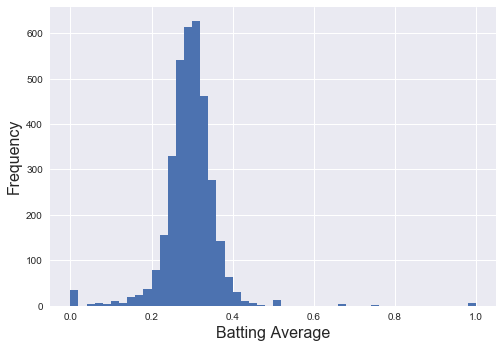

In [133]:
plt.hist(df['ba'], bins=50)
plt.xlabel('Batting Average', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [55]:
# Let's alter the range
import pylab

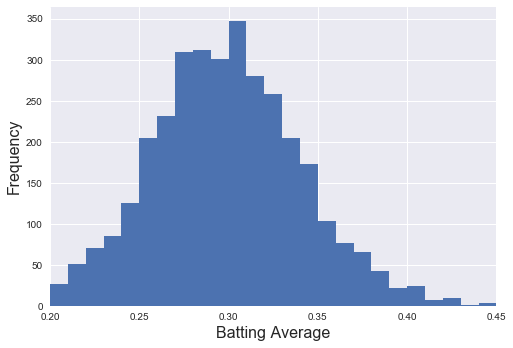

In [134]:
# The distribution of the best hitters ever to play the game.
plt.hist(df['ba'], bins=100)
pylab.xlim([.2,.45])
plt.xlabel('Batting Average', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Maybe we can plot strikeout rate to walk rate. But to do this, we either will have to take a new dataset that combined numbers (I did this in R), or groupby in Python (I'd prefer not to do this).

In [65]:
bb_and_so = df.groupby(['name'])['so','bb'].agg('sum')

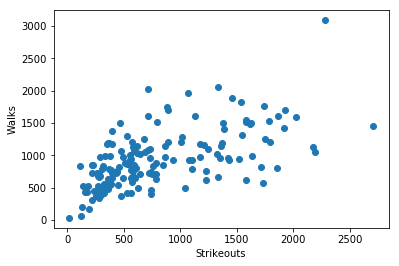

In [66]:
plt.scatter(bb_and_so['so'], bb_and_so['bb'])
plt.xlabel('Strikeouts')
plt.ylabel('Walks')

I want to add an identity line to show where players have geater amount of walks than they do strikeouts. I'll use np.linspace to create an array which I can plot ont he graph.

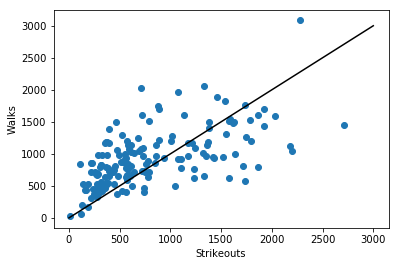

In [68]:
x = np.linspace(0,3000, 3001)
plt.scatter(bb_and_so['so'], bb_and_so['bb'])
plt.xlabel('Strikeouts')
plt.ylabel('Walks')
plt.plot(x,x,'k-') # identity line

In [106]:
# Try with seaborn
import seaborn as sns

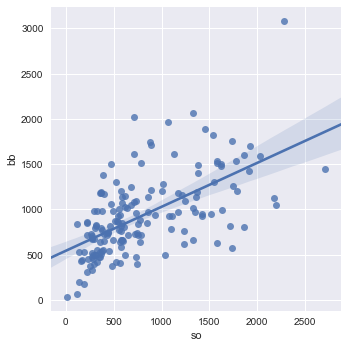

In [107]:
sns.lmplot("so", "bb", bb_and_so)

In [73]:
bb_and_so.sort_values('so', ascending = 0).head()

,so,bb
name,,
Reggie Jackson,2708.0,1448.0
Rickey Henderson,2277.0,3086.0
Willie Stargell,2196.0,1052.0
Tony Prez,2176.0,1125.0
Mike Schmidt,2028.0,1594.0


In [74]:
bb_and_so.sort_values('bb', ascending = 0).head()

,so,bb
name,,
Rickey Henderson,2277.0,3086.0
Babe Ruth,1330.0,2062.0
Ted Williams,709.0,2021.0
Joe Morgan,1071.0,1970.0
Carl Yastrzemski,1458.0,1892.0


# Rank OPS's

Okay, in order to calculate overall OPS, I'll have to first create a dataframe that groups by players and takes the sums of hits, walks, ibb's, plate appearances, total bases, and total at bats. Let's do this first.

In [77]:
ops_group = df.groupby(['name'])['hits', 'bb', 'ibb', 'pa', 'ab', 'tb'].agg('sum')

See how many missing values we have

In [86]:
np.sum(ops_group.isnull())

hits     0
bb       0
ibb      0
pa       0
ab       0
tb       0
ba       0
obp     96
slg      0
dtype: int64

Next, let's do some calculations to record the BA, OBP, SLG, and OPS.

Replace missing IBB's with zero.

In [85]:
ops_group['ibb'] = ops_group['ibb'].fillna(0)

In [87]:
ops_group['ba'] = ops_group['hits'] / ops_group['ab']

In [88]:
ops_group['obp'] = (ops_group['hits'] + ops_group['bb'] + ops_group['ibb']) / ops_group['pa']

In [89]:
ops_group['slg'] = ops_group['tb'] / ops_group['ab']

In [92]:
ops_group['ops'] = ops_group['obp'] + ops_group['slg']

In [93]:
ops_group.head()

,hits,bb,ibb,pa,ab,tb,ba,obp,slg,ops
name,,,,,,,,,,
Al Kaline,3000,1276.0,131.0,11566,10088,4842,0.297383,0.381031,0.479976,0.861007
Al Lpez,2195,587.0,0.0,8777,8050,2901,0.272671,0.316965,0.360373,0.677337
Al Simmons,3251,639.0,0.0,10523,9733,5157,0.334018,0.369666,0.529847,0.899513
Andre Dawson,2910,624.0,143.0,11206,10320,5040,0.281977,0.328128,0.488372,0.816500
Arky Vaughan,2184,981.0,0.0,8054,6903,3112,0.316384,0.392972,0.450818,0.843791


In [101]:
ops_group['ops'].mean()

0.8236163173186071

Okay!!! Now let's histogram this from biggest to smallest.

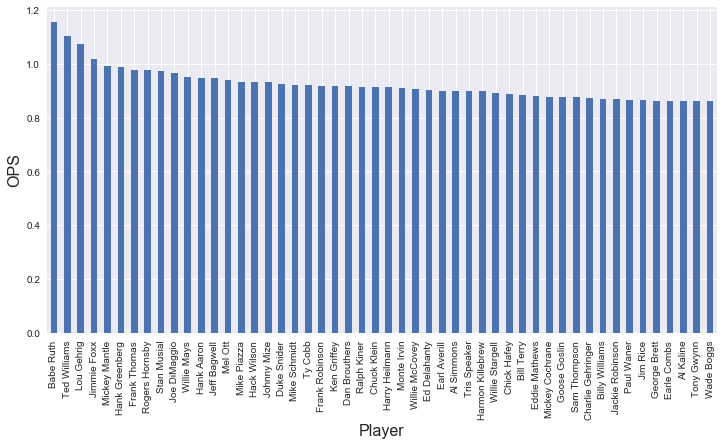

In [136]:
plt.figure(figsize=(12,6))
ops_group['ops'].sort_values(ascending=False).head(50).plot.bar()
plt.xlabel('Player', fontsize=16)
plt.ylabel('OPS', fontsize=16)

Might be kinda cool to color by team color...or too much work.